# An Analysis of Loan Data from Prosper.
## by Neto Anyama.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Preliminary Wrangling</a></li>
<li><a href="#univariate">Univariate Exploration</a></li>
<li><a href="#bivariate">Bivariate Exploration</a></li>
<li><a href="#multivariate">Multivariate Exploration</a></li>
<li><a href="#conclusions">Conclusions and Summary</a></li>
<li><a href="#references">References</a></li>
</ul>


<a id='intro'></a>
## Introduction
Hi! I'm Neto Anyama and this is my third technical project for this nanodegree course. This project specifically targets data visualization skills. I visualized data from Prosper loans, recorded between 2005 and 2014. I obtained this dataset from [here](https://www.google.com/url?q=https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv&sa=D&ust=1554484977406000). The dataset contained 113,937 entries, with 81 columns. My main aim in this project was to determine what factors (such as loan term, occupation, income range, amount borrowed, among others) affected the annual percentage rate accorded to each borrower. My secondary aim was to observe the annual trends in features such as APR, Loan Amount, Monthly Income etc.

#### About Prosper.
[Prosper](https://www.prosper.com/) is America’s first marketplace lending platform, with over \\$10 billion in funded loans. It allows people to invest in each other in a way that is financially and socially rewarding. On Prosper, borrowers list loan requests between \\$2,000 and \\$35,000 and individual investors invest as little as \\$25 in each loan listing they select. Prosper handles the servicing of the loan on behalf of the matched borrowers and investors.

<a id='wrangling'></a>
## Preliminary Wrangling


To get started, I imported all necessary libraries (pandas, numpy, matplotlib and seaborn) and loaded my data.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


%matplotlib inline

In [2]:
prosper_df = pd.read_csv('/Users/netoa/Downloads/prosperLoanData.csv')

In [3]:
print(prosper_df.shape)
prosper_df.head()

(113937, 81)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
prosper_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

Then, I performed a little bit of assessment and cleaning, as outlined below:
1. Filling Listing Number with leading 0s and converting it to a string.
2. Extracting date from chosen columns and converting to datatime datatype.
3. Creating a new column AvgCreditScore using CreditScoreRangeUpper and CreditScoreRangeLower.
4. Renaming selected columns: ProsperRating (numeric), ProsperRating (Alpha) and ListingCategory (numeric).
5. Converting ProsperRating_numeric, ProsperRating_alpha, CreditGrade and Term into ordered categorical types.
6. Converting ListingCategory and LoanStatus into unordered categories.
7. Fill null values and converting TotalProsperLoans to the int datatype.
8. Replacing numeric listing categories with actual labels.
9. Dropping null values in the BorrowerAPR column.
10. Creating columns for years and quarters of origination. 
11. Creating a df, avg_vals containing the average loan amount, apr and monthly income per year.



In [5]:
#filling Listing Number with leading 0s and converting it to a string
prosper_df.ListingNumber = prosper_df.ListingNumber.astype(str).str.pad(7, side= 'left', fillchar='0')

In [6]:
#extracting date from chosen columns and converting to datatime datatype.
prosper_df['ListingCreationDate']=pd.to_datetime(prosper_df['ListingCreationDate']).dt.date
prosper_df['ClosedDate']=pd.to_datetime(prosper_df['ClosedDate']).dt.date

prosper_df = prosper_df.astype({'ListingCreationDate':'datetime64[ns]',
                                     'ClosedDate':'datetime64[ns]'})

In [7]:
#creating a new column AvgCreditScore using CreditScoreRangeUpper and CreditScoreRangeLower
prosper_df.CreditScoreRangeLower.fillna(0, inplace=True)

prosper_df.CreditScoreRangeUpper.fillna(0, inplace=True)

prosper_df = prosper_df.astype({'CreditScoreRangeUpper':'int',
                                     'CreditScoreRangeLower':'int'})

prosper_df['AvgCreditScore'] = ((prosper_df.CreditScoreRangeUpper + prosper_df.CreditScoreRangeLower)/2)

In [8]:
#renaming selected columns
prosper_df.rename(columns={'ProsperRating (numeric)':'ProsperRating_numeric', 
                              'ProsperRating (Alpha)':'ProsperRating_alpha',
                              'ListingCategory (numeric)':'ListingCategory'}, inplace = True)

In [9]:
# converting ProsperRating_numeric, ProsperRating_alpha and CreditGrade into ordered categorical types
ordinal_vars = {'ProsperRating_numeric': [0, 1, 2, 3, 4, 5, 6, 7],
                    'ProsperRating_alpha': ['N/A', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
                    'CreditGrade': ['N/A', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
                       'Term': [12, 36, 60]}

for var in ordinal_vars:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_vars[var])
    prosper_df[var] = prosper_df[var].astype(ordered_var)

In [10]:
# converting ListingCategory and LoanStatus into unordered categories
prosper_df = prosper_df.astype({'ListingCategory':'category', 'LoanStatus':'category'})

In [11]:
#fill null values and converting TotalProsperLoans to the int datatype
prosper_df.TotalProsperLoans.fillna(0, inplace=True)
prosper_df = prosper_df.astype({'TotalProsperLoans':'int'})

In [12]:
#replace numeric listing categories with actual labels
prosper_df.ListingCategory.replace({0: 'Not Available', 1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 
    4: 'Personal Loan', 5: 'Student Use', 6: 'Auto', 7: 'Other', 8: 'Baby&Adoption', 
    9: 'Boat', 10: 'Cosmetic Procedure', 11: 'Engagement Ring', 12: 'Green Loans', 
    13: 'Household Expenses', 14: 'Large Purchases', 15: 'Medical/Dental', 16: 'Motorcycle', 
    17: 'RV', 18: 'Taxes', 19: 'Vacation', 20: 'Wedding Loans'}, inplace=True)

In [13]:
prosper_df.Occupation.unique()

array(['Other', 'Professional', 'Skilled Labor', 'Executive',
       'Sales - Retail', 'Laborer', 'Food Service', 'Fireman',
       'Waiter/Waitress', 'Construction', 'Computer Programmer',
       'Sales - Commission', 'Retail Management', 'Engineer - Mechanical',
       'Military Enlisted', 'Clerical', nan, 'Teacher', 'Clergy',
       'Accountant/CPA', 'Attorney', 'Nurse (RN)', 'Analyst',
       "Nurse's Aide", 'Investor', 'Realtor', 'Flight Attendant',
       'Nurse (LPN)', 'Military Officer', 'Food Service Management',
       'Truck Driver', 'Administrative Assistant',
       'Police Officer/Correction Officer', 'Social Worker',
       'Tradesman - Mechanic', 'Medical Technician', 'Professor',
       'Postal Service', 'Civil Service', 'Pharmacist',
       'Tradesman - Electrician', 'Scientist', 'Dentist',
       'Engineer - Electrical', 'Architect', 'Landscaping',
       'Tradesman - Carpenter', 'Bus Driver', 'Tradesman - Plumber',
       'Engineer - Chemical', 'Doctor', 'Chemist',


In [14]:
#categorizing occupations into bins

prosper_df.Occupation.replace({'Student - College Graduate Student':'Student', 'Student - Technical School':'Student',
        'Student - College Sophomore':'Student', 'Student - College Junior':'Student', 'Student - Community College':'Student', 
                            'Student - College Senior':'Student', 'Student - College Freshman':'Student'}, 
                                   inplace=True)

prosper_df.Occupation.replace({'Executive':'Professional', 'Judge':'Professional', 'Pilot - Private/Commercial':'Professional',
                                   'Biologist':'Professional', 'Psychologist':'Professional', 'Principal':'Professional',
                                    'Chemist':'Professional', 'Doctor':'Professional', 'Engineer - Chemical':'Professional', 
                                    'Architect':'Professional', 'Dentist':'Professional', 'Scientist':'Professional',
                                    'Engineer - Electrical':'Professional','Pharmacist':'Professional','Nurse (LPN)':'Professional',
                                    'Nurse (RN)':'Professional', 'Attorney':'Professional', 'Accountant/CPA':'Professional',
                                    'Executive':'Professional', 'Engineer - Mechanical':'Professional', 
                                    'Flight Attendant':'Professional', 'Teacher':'Professional', 'Professor':'Professional',
                                   'Investor':'Professional'}, 
                                   inplace=True)

prosper_df.Occupation.replace({'Laborer':'Skilled Labor','Construction':'Skilled Labor', "Teacher's Aide":'Skilled Labor',
                                   'Tradesman - Electrician':'Skilled Labor','Tradesman - Mechanic':'Skilled Labor', 
                                    'Tradesman - Carpenter':'Skilled Labor', 'Medical Technician':'Skilled Labor',
                                   'Tradesman - Plumber':'Skilled Labor', 'Civil Service':'Skilled Labor',  
                                    'Social Worker':'Skilled Labor', 'Retail Management':'Skilled Labor',
                                   'Police Officer/Correction Officer':'Skilled Labor', 'Administrative Assistant':'Skilled Labor',
                                   'Military Officer':'Skilled Labor', 'Food Service Management':'Skilled Labor',
                                    'Realtor':'Skilled Labor',"Nurse's Aide":'Skilled Labor', 
                                   'Analyst':'Skilled Labor', 'Computer Programmer':'Skilled Labor'}, 
                                   inplace=True)

prosper_df.Occupation.replace({'Bus Driver':'Unskilled Labor','Landscaping':'Unskilled Labor', 'Potal Service':'Unskilled Labor',
                                   'Sales - Commission':'Unskilled Labor', 'Waiter/Waitress':'Unskilled Labor', 
                                    'Fireman':'Unskilled Labor', 'Food Service':'Unskilled Labor',
                                   'Sales - Retail':'Unskilled Labor', 'Military Enlisted':'Unskilled Labor',
                              'Truck Driver':'Unskilled Labor', 'Postal Service':'Unskilled Labor'}, 
                                   inplace=True)

prosper_df.Occupation.replace({'Homemaker':'Other', 'Religious':'Other', 'Car Dealer':'Other', 'Clergy':'Other',
                                   'Clerical':'Other'}, 
                                   inplace=True)

prosper_df.Occupation.fillna('Unspecified', inplace=True)
prosper_df = prosper_df.astype({'Occupation':'category'})

In [15]:
prosper_df.Occupation.unique()

['Other', 'Professional', 'Skilled Labor', 'Unskilled Labor', 'Unspecified', 'Student']
Categories (6, object): ['Other', 'Professional', 'Skilled Labor', 'Student', 'Unskilled Labor', 'Unspecified']

In [16]:
prosper_df.IncomeRange.replace({'Not employed':'$0', 'Not displayed':'N/A'}, inplace=True)

income_groups = ['N/A', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
income_range = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = income_groups)

prosper_df['IncomeRange'] = prosper_df['IncomeRange'].astype(income_range)

In [17]:
prosper_df.IncomeRange.unique()

['$25,000-49,999', '$50,000-74,999', 'N/A', '$100,000+', '$75,000-99,999', '$1-24,999', '$0']
Categories (7, object): ['N/A' < '$0' < '$1-24,999' < '$25,000-49,999' < '$50,000-74,999' < '$75,000-99,999' < '$100,000+']

In [18]:
# dropping null values in the BorrowerAPR column.
prosper_df.dropna(subset=['BorrowerAPR'], inplace=True)

In [19]:
prosper_df.shape

(113912, 82)

In [20]:
# creating the year and quarter columns 
list_Quarter = [i.split(" ")[0][:2] for i in  list(prosper_df['LoanOriginationQuarter'])]

prosper_df['Loan_Year']=prosper_df['ListingCreationDate'].dt.year

prosper_df['Loan_Quarter'] = list_Quarter

In [21]:
# converting the IsBorrowerHomeowner column to string
prosper_df = prosper_df.astype({'IsBorrowerHomeowner':'object'})

In [22]:
# creating a df, avg_vals containing the average loan amount, apr and monthly income per year.
avg_vals = prosper_df.groupby('Loan_Year')['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome'].mean()
avg_vals

C:\Users\netoa\AppData\Local\Temp/ipykernel_4336/336378425.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_vals = prosper_df.groupby('Loan_Year')['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome'].mean()


,LoanOriginalAmount,BorrowerAPR,StatedMonthlyIncome
Loan_Year,,,
2006,4845.462727,0.200169,4730.656215
2007,7066.793112,0.185581,4677.178261
2008,5964.698393,0.204301,4604.192859
2009,4393.478241,0.216640,5104.667309
2010,4841.877396,0.240572,5324.741832
2011,6704.403339,0.262221,5636.943956
2012,7876.517130,0.252819,5725.886706
2013,10610.240110,0.212512,6169.913615
2014,11915.461617,0.182564,6310.134402


In [23]:
years = prosper_df.Loan_Year.value_counts()

#create df from years above
data = {'year': [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014], 
        'counts': [6211, 11557, 11263, 2206, 5530, 11442, 19556, 35413, 10734]}
years_df =  pd.DataFrame(data)

years_df

,year,counts
0,2006,6211
1,2007,11557
2,2008,11263
3,2009,2206
4,2010,5530
5,2011,11442
6,2012,19556
7,2013,35413
8,2014,10734


### What is the structure of your dataset?

There are 113,937 loan entries with 81 features, ranging from Borrower Annual Percentage Rate, Loan Status, Loan Origination date, Listing category, among others. There are no duplicate values.

### What is/are the main feature(s) of interest in your dataset?

My aim in this exploration is to determine what factors increase/decrease the BorrowerAPR any given individual can receive on a loan. Furthermore, I tried to observe the yearly trends in loan origination, loan amount and APR.

The relevant columns are as follows:
- BorrowerAPR: The Borrower's Annual Percentage Rate (APR) for the loan.
- Original Loan Amount: 
- Average Credit Score: Created from the CreditScoreRangeUpper and CreditScoreRangeLower columns, this is the average value of the borrower's credit score as provided by a consumer credit rating agency.
- Listing Category: The category of the listing that the borrower selected when posting their listing.
- Prosper Rating: The Prosper Rating assigned at the time the listing was created between AA - HR. Applicable for loans originated after July 2009.
- Credit Grade: The Credit rating that was assigned at the time the listing went live. Applicable for listings pre-2009 period and will only be populated for those listings.
- Occupation: The Occupation selected by the Borrower at the time they created the listing.
- Stated Monthly Income: The monthly income of the borrower at the time the listing was created.
- Loan_Year: Created from the ListingCreationDateColumn, this is the year of loan origination.
- Income Range: The income range of the borrower at the time the listing was created.
- Borrower State: The two letter abbreviation of the state of the address of the borrower at the time the listing was created.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The main feature in this dataset is the Borrower Annual Percentage Rate (BorrowerAPR). Other supporting features are loan original amount, credit status, listing category, loan term, prosper rating, average credit score.

I arranged my questions into three groups for clarity: Univariate, Bivariate and Multivariate Exploration.

##### Univariate 
- What is the distribution of APRs?
- What, using listing categories, are the 10 commonest reasons for taking a loan? 
- What are the highest given loan amounts (principals)?
- How are borrowers' occupations distributed throughout the dataset?
- Under what loan status do the most borrowers fall?
- From which 10 states do the most borrowers originate?


##### Bivariate
- What income grade gets an increased APR?
- What category of occupations gets an increased APR?
- What is the correlation between a borrower's average credit score and APR?
- Before July 2009, what was the relationship between Credit Rating and APR? What about after July 2009?
- Do larger principals attract higher APRs?
- Do longer terms affect APR?
- What is the yearly trend in average Borrower APR?
- What is the distribution of APRs by state?

##### Multivariate
- What is the yearly trend in loan amount and APR?
- What is the yearly trend in original loan amount against monthly income?

<a id='univariate'></a>
## Univariate Exploration.
The first step in this visualization is to observe the distributions of my main variables of interest: APR, Loan Status, Listing Category, Occupation etc.

In this section, I answered the following questions:

- What is the distribution of APRs?
- What, using listing categories, are the 10 commonest reasons for taking a loan? 
- What is the yearly trend in using Prosper?
- What are the highest given loan amounts (principals)?
- How are borrowers' occupations distributed throughout the dataset?
- Under what loan status do the most borrowers fall?
- From which 10 states do the most borrowers originate?

### Problem 1: What is the distribution of APRs?

In [24]:
prosper_df['BorrowerAPR'].describe()

count    113912.000000
mean          0.218828
std           0.080364
min           0.006530
25%           0.156290
50%           0.209760
75%           0.283810
max           0.512290
Name: BorrowerAPR, dtype: float64

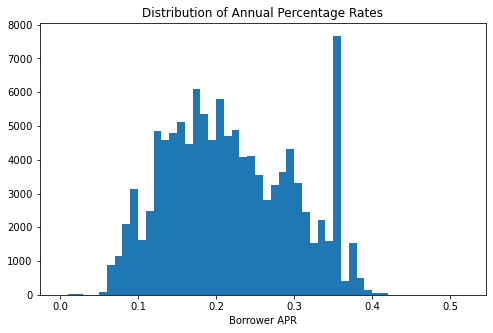

In [25]:
bins = np.arange(0, prosper_df['BorrowerAPR'].max()+0.01, 0.01)

plt.figure(figsize=[8, 5])
plt.hist(data = prosper_df, x = 'BorrowerAPR', bins = bins)
plt.xlabel('Borrower APR')
plt.title('Distribution of Annual Percentage Rates')
plt.show()

In the histogram above, we can see that our distribution is multimodal. The highest peak of our distribution at the point a little over 0.35%. This means that borrowers were most commonly granted an annual percentage rate of about 0.35%.

### Problem 2: What, using listing categories, are the commonest reasons for taking a loan?

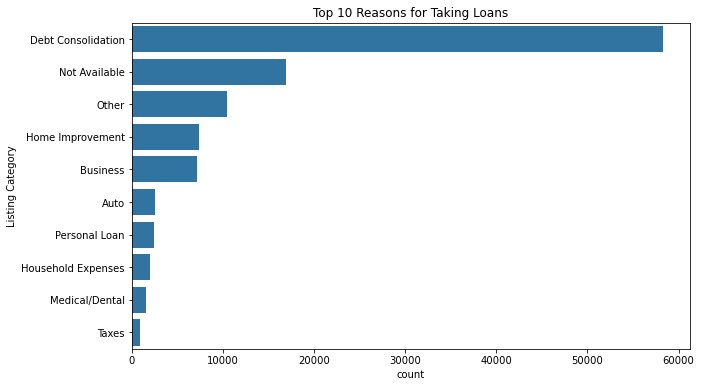

In [26]:
plt.figure(figsize=[10,6])

freq = prosper_df['ListingCategory'].value_counts().head(10)
gen_order = freq.index

sb.countplot(data=prosper_df, y='ListingCategory', order=gen_order, color=sb.color_palette()[0])
plt.ylabel('Listing Category')
plt.title('Top 10 Reasons for Taking Loans');

In [27]:
prosper_df['ListingCategory'].value_counts(normalize=True).head(10)

Debt Consolidation    0.511869
Not Available         0.148711
Other                 0.092124
Home Improvement      0.065252
Business              0.063110
Auto                  0.022579
Personal Loan         0.021025
Household Expenses    0.017522
Medical/Dental        0.013361
Taxes                 0.007769
Name: ListingCategory, dtype: float64

As demonstrated by the horizontal bar chart above, **Debt Consolidation (58,308 borrowers/51.19%)** is by far the most common reason why the borrowers in this dataset sought loans. 

### Problem 3: What is the yearly trend in using Prosper?

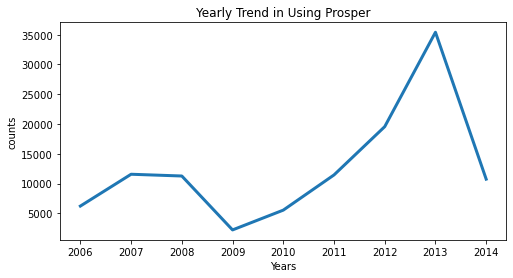

In [28]:
plt.figure(figsize=[8,4])
sb.lineplot(data=years_df, x ='year', y = 'counts', legend='full', lw=3);
plt.xlabel('Years')
plt.title('Yearly Trend in Using Prosper');

The above line graph shows that in spite of an intial slow start, with a rise and fall in patronage, Prosper saw a steady rise in patronage from 2009 that peaked in 2013. Unfortunately, there was a sharp drop between 2013 and 2014.

### Problem 4: What are the highest given loan amounts (principals)?

C:\Users\netoa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


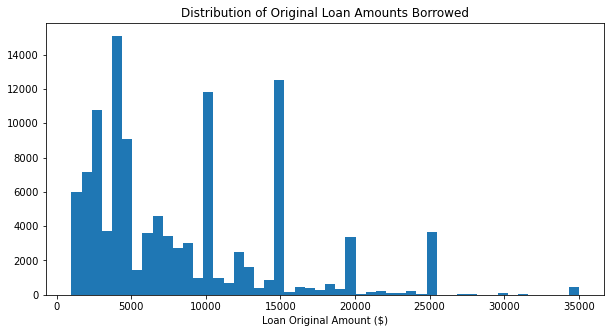

In [29]:
plt.figure(figsize=[10, 5])
sb.distplot(prosper_df['LoanOriginalAmount'], kde=False, hist_kws = {'alpha' : 1});
plt.xlabel('Loan Original Amount ($)')
plt.title('Distribution of Original Loan Amounts Borrowed')
plt.show()

The histogram demonstrates a multimodal distribution that is skewed to the right. Generally, it can be inferred that the vast majority of borrowers were granted loans of \\$15,000 or less. Only a small amount of borrowers obtained loans of amounts greater than \\$15,000. Specifically, we can infer that the highest number of borrowers were granted loans of about \\$4000-\\$4500. 

### Problem 5: How are borrowers' occupations distributed throughout the dataset?

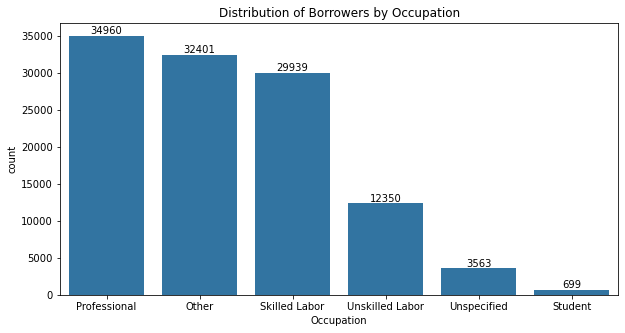

In [59]:
plt.figure(figsize=[10, 5])

freq = prosper_df['Occupation'].value_counts()
gen_order = freq.index

ax = sb.countplot(data = prosper_df, x = 'Occupation', color=sb.color_palette()[0], order = gen_order)
plt.xticks()
plt.xlabel('Occupation')
plt.title('Distribution of Borrowers by Occupation');
ax.bar_label(ax.containers[0], label_type='edge');

In [31]:
prosper_df.Occupation.value_counts(normalize=True)

Professional       0.306904
Other              0.284439
Skilled Labor      0.262826
Unskilled Labor    0.108417
Unspecified        0.031279
Student            0.006136
Name: Occupation, dtype: float64

People with **Professional** occupations such as Judge, Pilot, Psychologist etc, made up the bulk **(34,960 borrowers/30.69%)** of the dataset. However, the difference between the frequency that occupation group and the next in line, **Other**, is not very much. Finally, borrowers in the **Unskilled Labor, Unspecified and Student** groups make up a very small amount **(14.58% combined)** of the dataset.

### Problem 6: Under what loan status do the most borrowers fall?

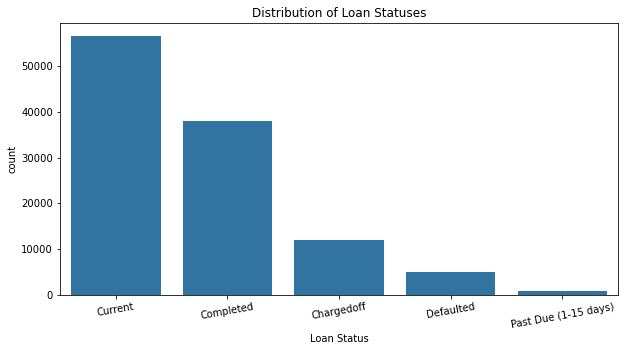

In [32]:
plt.figure(figsize=[10, 5])

freq = prosper_df['LoanStatus'].value_counts().head()
gen_order = freq.index

sb.countplot(data = prosper_df, x = 'LoanStatus', color=sb.color_palette()[0], order = gen_order)
plt.xticks(rotation=10)
plt.xlabel('Loan Status')
plt.title('Distribution of Loan Statuses');

In [33]:
prosper_df.LoanStatus.value_counts(normalize=True).head()

Current                 0.496664
Completed               0.334021
Chargedoff              0.105274
Defaulted               0.044052
Past Due (1-15 days)    0.007076
Name: LoanStatus, dtype: float64

From the above bar chart, **56,576 (49.67%)** of all loans are current, meaning that they are still running and on time. Closely following is the Completed (paid in full) category, with **38,074 (33.42%)** loans. Given that these two groups make up over 70% of the dataset, it can then be said that borrowers generally repay their loans, and on time.

### Problem 7: From which 10 states do the most borrowers originate?

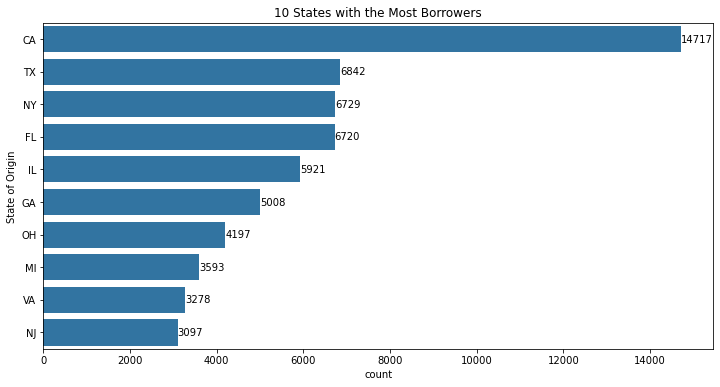

In [61]:
plt.figure(figsize=[12,6])

freq_state = prosper_df['BorrowerState'].value_counts().head(10)
gen_order = freq_state.index

ax = sb.countplot(data=prosper_df, y='BorrowerState', order=gen_order, color=sb.color_palette()[0])
plt.ylabel('State of Origin')
plt.title('10 States with the Most Borrowers');
ax.bar_label(ax.containers[0], label_type='edge');

The horizontal bar chart shows that the State of California had the most borrowers.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

To plot the distribution of the Annual Percentage Rate, I had to use a larger bin size to effectively visualize. There weren't unusual points that required removal.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The original Listing Category column contained values 1-20, one for each category. However, it was going to be a hassle reading the numbers with their appropriate labels. So, I had to replace the entire column with the correct labels. 

I also had to create two new dataframes: `avg_vals` and `years_df` to make easier visualizations.

Perhaps the most tasking transformation I had to make was in the Occupation column. There were originally unique occupations. Using information obtained from [here](https://smallbusiness.chron.com/skilled-labor-vs-unskilled-labor-46154.html), I classed each profession into Professional, Skilled Labor, Unskilled Labor, Student and Other.

<a id='bivariate'></a>
## Bivariate Exploration

After examining the distributions and frequencies of my core variables of interest in the univariate section, I decided to compare these variables to one another in this bivariate part.

In this section, I answered the following questions:
- What is the yearly trend in average Borrower APR?
- What income grade gets an increased APR?
- What category of occupations gets an increased APR?
- What is the correlation between a borrower's average credit score and APR?
- Before July 2009, what was the relationship between Credit Rating and APR? What about after July 2009?
- Do larger principals attract higher APRs?
- Do longer terms affect APR?
- What is the distribution of APRs by state?

### Problem 8: What is the yearly trend in average Borrower APR?

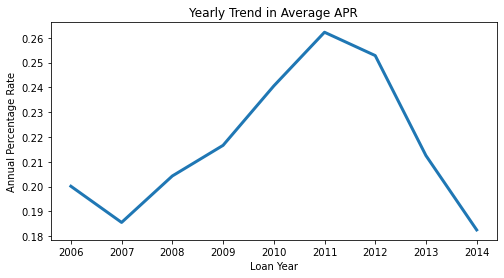

In [35]:
plt.figure(figsize=[8,4])
ax = sb.lineplot(data=avg_vals, x ='Loan_Year', y = 'BorrowerAPR', legend='full', lw=3)
plt.xlabel('Loan Year')
plt.ylabel('Annual Percentage Rate')
plt.title('Yearly Trend in Average APR');

Our line chart shows rather clearly that there was a steady increase in Annual Percentage Rate between the years 2007 and 2011. However, after 2011, there was a steep decline in APR, reducing with each year. This drop in APR may be regarded as positive by borrowers.

### Problem 9: What income grade gets an increased APR?

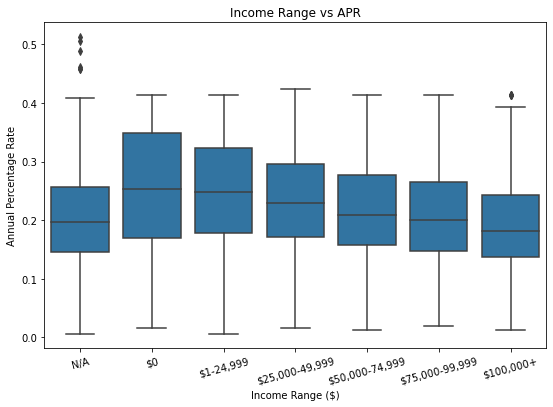

In [52]:
plt.figure(figsize=[9,6])
base_color= sb.color_palette()[0]
sb.boxplot(data=prosper_df, x='IncomeRange', y='BorrowerAPR', color=base_color);
plt.xlabel('Income Range ($)')
plt.ylabel('Annual Percentage Rate')
plt.title('Income Range vs APR')
plt.xticks(rotation=15);

It can be inferred from our box plot above that borrowers in higher income brackets are given lower APRs. Borrowers that earn \\$0 get a median rate of about 0.25%. This figure reduces with increased income. N/A stands for those whose income ranges are unspecified.

### Problem 10: Borrowers with what occupations get higher APRs?

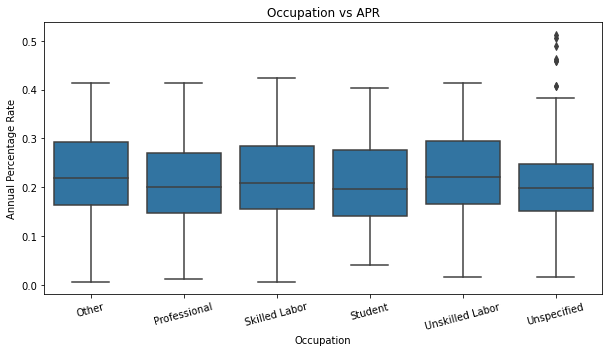

In [37]:
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[0]
sb.boxplot(data=prosper_df, x='Occupation', y='BorrowerAPR', color=base_color);
plt.ylabel('Annual Percentage Rate')
plt.title('Occupation vs APR')
plt.xticks(rotation=15);

Although it is a little difficult to tell from the box plot, the Skilled Labor category receives a higher range of APRs, compared to the other categories.

### Problem 11: What is the relationship between a borrower's average credit score and APR?

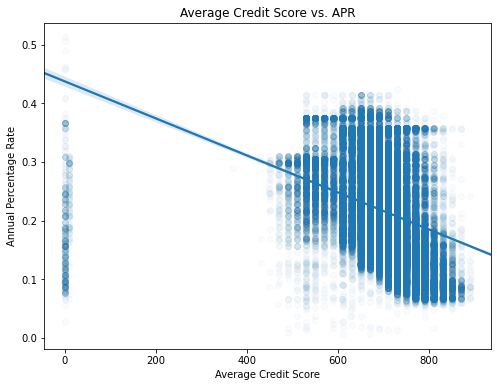

In [64]:
plt.figure(figsize=[8,6])
sb.regplot(data = prosper_df, x = 'AvgCreditScore', y = 'BorrowerAPR', truncate=False,
          x_jitter=0.7, scatter_kws={'alpha':1/40});
plt.xlabel('Average Credit Score')
plt.ylabel('Annual Percentage Rate')
plt.title('Average Credit Score vs. APR');

We can see from the above scatter plot that a borrower's average credit score has a negative correlation with APR received. Therefore, a higher credit score tends to earn a lower annual percentage (interest) rate.

### Problem 12: Before July 2009, what was the relationship between Credit Rating and APR? What about after July 2009?

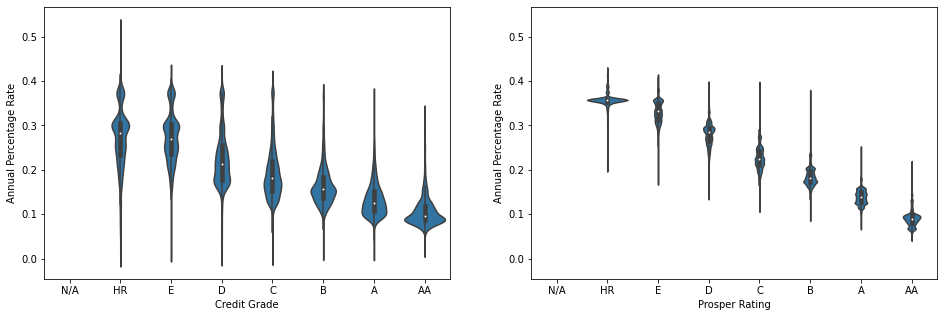

In [39]:
plt.figure(figsize = [16, 5])
base_color = sb.color_palette()[0]

# LEFT plot: Before July 2009
plt.subplot(1, 2, 1)
#Let's return the axes object
ax1 = sb.violinplot(data=prosper_df, x='CreditGrade', y='BorrowerAPR', color=base_color);
plt.xticks();
plt.xlabel('Credit Grade')
plt.ylabel('Annual Percentage Rate')

# RIGHT plot: After July 2009
plt.subplot(1, 2, 2)
sb.violinplot(data=prosper_df, x='ProsperRating_alpha', y='BorrowerAPR', color=base_color);
plt.xticks();
plt.xlabel('Prosper Rating')
plt.ylabel('Annual Percentage Rate')
plt.ylim(ax1.get_ylim()); # set y-axis limits to be same as left plot

### Problem 13: Do larger original loan amounts (principals) attract higher APRs?

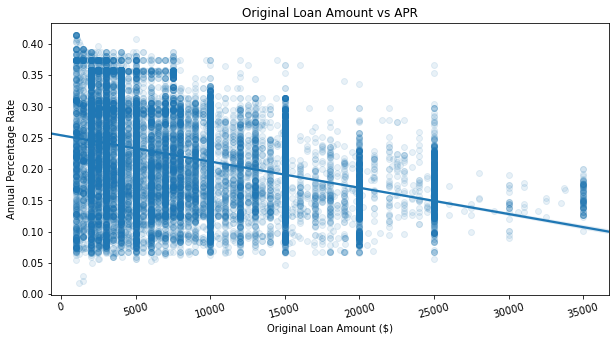

In [40]:
# using a sample (20%) of the dataset to make the plot to avoid overplotting
plt.figure(figsize = [10, 5])
loan_samp = prosper_df.sample(n=20600, replace = False)
sb.regplot(data = loan_samp, x = 'LoanOriginalAmount', y = 'BorrowerAPR', truncate=False,
          x_jitter=0.7, scatter_kws={'alpha':1/10});
plt.xlabel('Original Loan Amount ($)')
plt.ylabel('Annual Percentage Rate')
plt.title('Original Loan Amount vs APR')
plt.xticks(rotation=15);

It can be inferred from the above scatter plot that there is also a negative correlation between Original Loan Amount and APR, i.e. a higher amount borrowed (principal) earns a lower APR.

### Problem 14: Do longer terms affect APR?

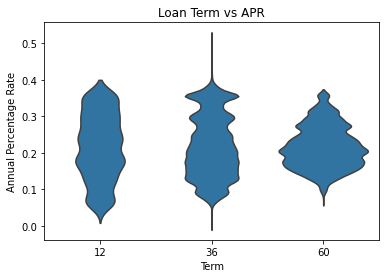

In [50]:
sb.violinplot(data = prosper_df, x = 'Term', y='BorrowerAPR', color = sb.color_palette()[0], inner=None);
plt.ylabel('Annual Percentage Rate')
plt.title('Loan Term vs APR');

From the violin plot above, we can see that the borrowers with 60-month loans are mainly distributed on the lower limit of the APR scale, i.e. they mostly earn lower APRs. Generally, the shorter the loan term, the higher the APR given.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
I noticed that some of the factors that increase the BorrowerAPR are lower income ranges, lower average credit scores, smaller loan amounts (principals), type of occupation (people in the Skilled labor category receive higher APRs), lower credit grade (before July 2009)/Prosper rating (after July 2009).

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

I did not expect the loan term to influence APR so much.

<a id='multivariate'></a>
## Multivariate Exploration

Finally, in this section, I posed the following questions which were primarily concerned with a trend analysis:

- What is the yearly trend in loan amount and APR?
- What is the yearly trend in original loan amount against monthly income?

### Problem 15: What is the yearly trend in loan amount and APR?

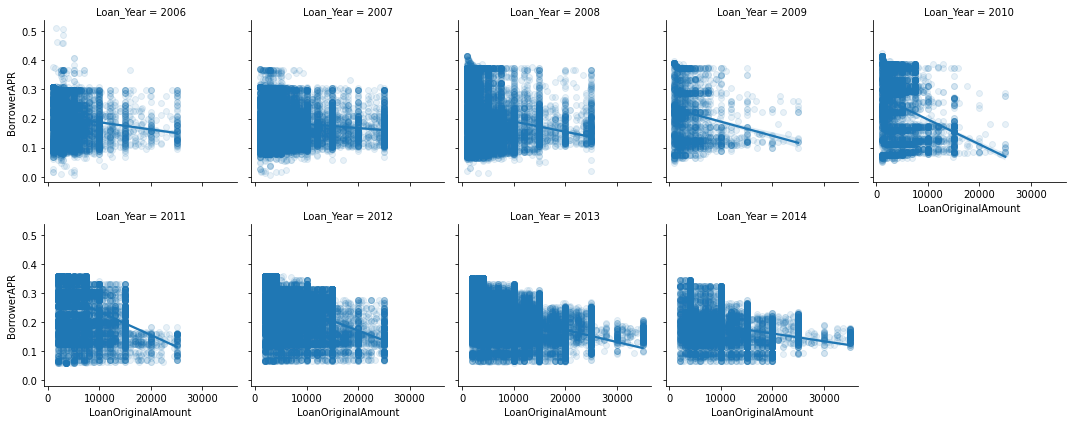

In [44]:
loan_sample = prosper_df.sample(n=10000, replace = False)
g = sb.FacetGrid(data = prosper_df, col_wrap = 5, col = 'Loan_Year', height=3)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.7, scatter_kws={'alpha':1/10});

The scatterplots have shown that:
- There is a rise and fall in the APR for each year
- Before 2013, loan amounts never got up to \\$30,000.
- There is a negative correlation between APR and loan amount.

### Problem 16: What is the yearly trend in original loan amount against monthly income?

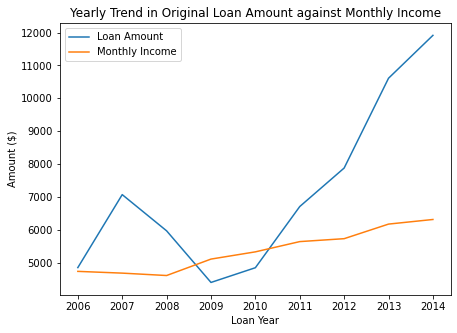

In [51]:
plt.figure(figsize=[7,5])
avg_vals['LoanOriginalAmount'].plot(label='Loan Amount', color=sb.color_palette()[0])
avg_vals['StatedMonthlyIncome'].plot(label='Monthly Income', color=sb.color_palette()[1]);
plt.xlabel('Loan Year')
plt.ylabel('Amount ($)')
plt.legend()
plt.title('Yearly Trend in Original Loan Amount against Monthly Income');

This multiple line chart records that there are annual increases in both Loan amount and Monthly Income, but Monthly Income only recorded very slow increase. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

It is important to note that Monthly Income is only increasing slightly on average. Thus it can be assumed that Prosper increased the loan amounts available to customers and decreased APR (seen in an earlier viz), probably to drive patronage.

I have a hunch that although there was an increase in loan amount between 2013 and 2014, it wasn't as high as 2012-2013. This also applies to APR. This may account for the drop in patronage in 2014.

### Were there any interesting or surprising interactions between features?

I didn't expect that monthly income was only increasing at such a slow rate. This explained the increased need for loans.

<a id='conclusions'></a>
## Conclusions and Summary
Finally, after careful wrangling and exploration of this dataset, I drew a few insights. As stated at the beginning of this project, I had two main aims when exploring this dataset: to determine what factors increase/decrease the BorrowerAPR any given individual can receive on a loan and to observe the annual trends in features such as APR, Loan Amount, Monthly Income etc.

Factors that increase the BorrowerAPR are as follows:
- Lower income ranges.
- Lower average credit scores.
- Smaller loan amounts (principals).
- Type of occupation: people in the Skilled labor category receive higher APRs.
- Lower credit grade (before)/Prosper rating.
- Year of loan origination (before 2011).
- Smaller loan terms.

Observable Annual Trends are as follows:
- In spite of an intial slow start, with a rise and fall in patronage, Prosper saw a steady rise in patronage from 2009 that peaked in 2013. Unfortunately, the was a sharp drop between 2013 and 2014.
- There was a steady increase in Annual Percentage Rate between the years 2007 and 2011. However, after 2011, there was a steep decline in APR, reducing with each year. This drop in APR may be regarded as positive by borrowers.
- There are annual increases in both Loan amount and Monthly Income. However, Monthly Income is only increasing slightly on average. Thus, it can be assumed that Prosper increased the loan amounts available to customers and decreased APR (seen in an earlier viz), probably to drive patronage.

#### Limitations.
1. The APRs given in the year 2005 were not recorded, impeding complete analysis of the data.
2. There were many unnecessary columns provided, making scanning of the data for important insights a lot easier.

<a id='references'></a>
## References

1. https://stackoverflow.com/questions/23836277/add-leading-zeros-to-strings-in-pandas-dataframe
2. https://stackoverflow.com/questions/48511484/data-type-conversion-error-valueerror-cannot-convert-non-finite-values-na-or
3. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html
4. https://towardsdatascience.com/8-visualizations-with-python-to-handle-multiple-time-series-data-19b5b2e66dd0
5. https://www.geeksforgeeks.org/string-slicing-in-python/
6. https://stackoverflow.com/questions/30405413/python-pandas-extract-year-from-datetime-dfyear-dfdate-year-is-not-wo
7. https://jianru-shi.github.io/Prosper_Loan_EDA/Prosper_Loan_EDA.html
8. https://trenton3983.github.io/files/UDACITY_R_Data_Analysis_Project.nb.html#introduction
9. https://www.geeksforgeeks.org/pandas-plot-multiple-time-series-dataframe-into-a-single-plot/?ref=rp
10. https://encycolorpedia.com/85bb65#:~:text=The%20color%20dollar%20bill%20with,approximate%20wavelength%20of%20557.61%20nm.
11. https://kanoki.org/2022/07/02/matplotlib-add-value-labels-on-bar-chart-using-bar-label/